In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("./Housing.csv")

# Number of rows and columns
print("Shape (rows, columns):", df.shape)

# Column names
print("\nColumns:")
print(df.columns.tolist())

# First 5 rows (head)
print("\nHead of the table:")
print(df.head())

# First row only
print("\nFirst row:")
print(df.iloc[0])

print ( df . describe () ) # summary stats
print ( df . info () ) # datatypes
print ( df . isna () . sum () )

print ( "\nCorreletion All Columns Boolean Columns Exempted:\n", df . corr (numeric_only=True) )

# or we can also include boolean columns with 0/1 Substitute like :
df_encoded = df.copy()
yes_no_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

for col in yes_no_cols:
    df_encoded[col] = df_encoded[col].map({"yes": 1, "no": 0})

# For furnishingstatus (3 categories), use one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=["furnishingstatus"], drop_first=True)
print ( "\nCorreletion All Columns:\n", df_encoded . corr () )

Shape (rows, columns): (545, 13)

Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Head of the table:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3     

In [35]:
# Normal Equiation Fit
import numpy as np
x = df["area"].to_numpy().reshape( -1 , 1) 
y = df["price"].to_numpy().reshape(-1,1)

#Biased n x 2
X = np.hstack([np.ones((x.shape[0],1)),x])

XtX = X.T @ X
Xty = X.T @ y

W = np.linalg.inv(XtX) @ Xty
w0, w1 = W.flatten().tolist()

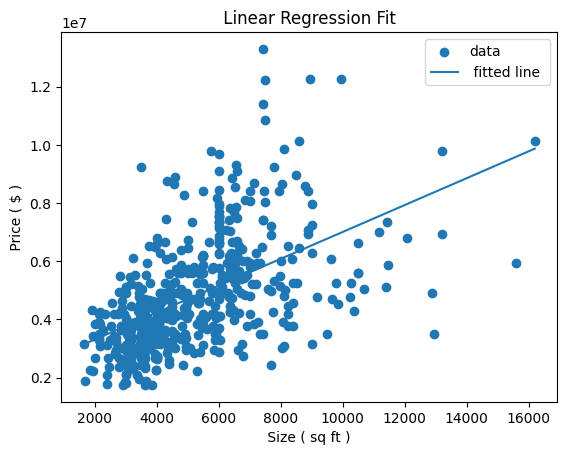

In [53]:
#Visualize the Fit
import matplotlib . pyplot as plt

# My Prediction
y_hat = X @ W

plt.scatter ( df [ "area" ] , df [ "price" ] , label = "data" )
xs = np . linspace ( df [ "area" ]. min () , df [ "area" ]. max () ,
100)
ys = w0 + w1*xs

plt . plot ( xs , ys , label = " fitted line " )
plt . xlabel ( " Size ( sq ft ) " )
plt . ylabel ( " Price ( $ ) " )
plt . title ( " Linear Regression Fit " )
plt . legend ()
plt . show ()

Train shapes: (540, 2) (540, 1)
Test shapes: (5, 2) (5, 1)


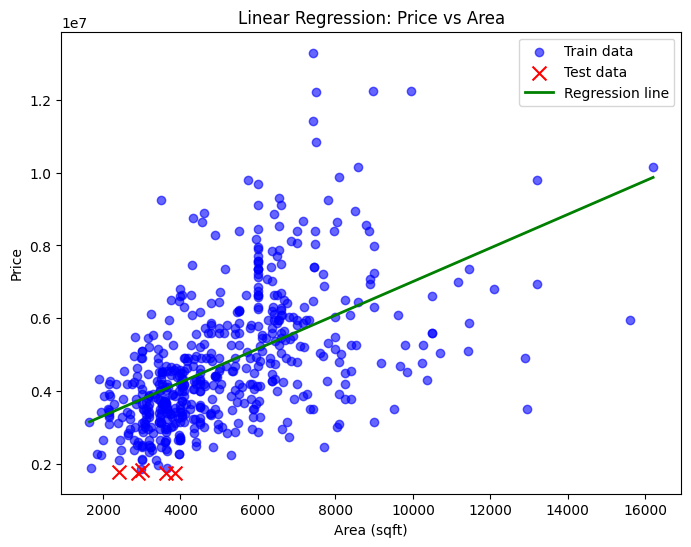

In [54]:
import matplotlib.pyplot as plt

# Split into train/test
train = df.iloc[:-5]
test  = df.iloc[-5:]

# --- Train set ---
Xtr = np.hstack([
    np.ones((train.shape[0], 1)),                # bias column
    train["area"].to_numpy().reshape(-1, 1)      # feature column
])
ytr = train["price"].to_numpy().reshape(-1, 1)

# --- Test set ---
Xte = np.hstack([
    np.ones((test.shape[0], 1)),                 # bias column
    test["area"].to_numpy().reshape(-1, 1)
])
yte = test["price"].to_numpy().reshape(-1, 1)

print("Train shapes:", Xtr.shape, ytr.shape)
print("Test shapes:", Xte.shape, yte.shape)

w = np.linalg.inv(Xtr.T @ Xtr) @ (Xtr.T @ ytr)

# predict test
y_pred_test = Xte @ w

# --- Plot ---
plt.figure(figsize=(8,6))

# Training points
plt.scatter(train["area"], train["price"], color="blue", alpha=0.6, label="Train data")

# Test points
plt.scatter(test["area"], test["price"], color="red", marker="x", s=100, label="Test data")

# Regression line
xs = np.linspace(df["area"].min(), df["area"].max(), 100)
ys = w0 + w1 * xs
plt.plot(xs, ys, color="green", linewidth=2, label="Regression line")

plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs Area")
plt.legend()
plt.show()